In [1]:
import numpy as np

In [2]:
class DenseLayer:
    def __init__(self, n_units, 
        input_size):
        
        self.n_units = n_units
        self.input_size = input_size
        
        # weights
        self.W = None
                
        # fermi activation function and its derivative
        self.fn = lambda x: 1 / (1 + np.exp(-x))
        self.df = lambda x: x * (1 - x)

    def init_weights(self):
        self.W = np.random.uniform(-0.5, 0.5, (self.n_units, self.input_size + 1))
   
    def __call__(self, X):
        
        # adding a vector of 1s for the bias-weight
        X_extended = np.hstack([
            np.ones((X.shape[0], 1)),
            X
        ])
        # multiplying the inputs by the weights
        Z = X_extended @ self.W.T
        
        # applying transfer function
        return self.fn(Z)

In [3]:
class SingleLayerPerceptron:
    def __init__(self, n_neurons, input_size, lr=0.1):
        
        # initializing the layer
        self.layer = DenseLayer(n_units = n_neurons, input_size = input_size)
        self.layer.init_weights()
        
        # learning rate
        self.lr = lr

    def forward(self, X):
        # forward propagation
        return self.layer(X)
    
    def extend(self, vec):
        return np.hstack([np.ones((vec.shape[0], 1)), vec])

    def backward(self, X, y_pred, y_true):
        delta = y_pred - y_true        
        derivative_to_output = np.array(list(map(self.layer.df,y_pred)))
        
        # weight change from delta rule
        dW = self.lr * ((y_true - y_pred) * derivative_to_output).T @ self.extend(X)
        self.layer.W += dW

    def mean_square_error(self, y_pred, y):
        return np.sqrt(((y_pred - y)**2).mean(axis=None))

In [4]:
import re

def parse_text_file(path):
    with open(path,'r') as f:
        data = f.readlines()
        
        # reading P, N, M using re
        P, N, M = map(int, re.findall(r'\d+', data[1]))
        
        X = np.zeros((P,N))
        y = np.zeros((P,M))
        for i, line in enumerate(data[2: 2 + P]):
            nums = list(map(float, line.split()))
            X[i] = nums[:N]
            y[i] = nums[N:]
    return P, N, M, X, y

In [5]:
import matplotlib.pyplot as plt

P, N, M, X, y = parse_text_file('PA-A_training_data_01.txt')
print(f'P = {P}, N = {N}, M = {M}')
print('X =', X)
print('y =', y)


model = SingleLayerPerceptron(n_neurons = M, input_size=N)

cycles_mse = []
for i in range(10000):
    y_pred = model.forward(X)
    model.backward(X, y_pred, y)
    cycles_mse.append([
        i,
        model.mean_square_error(y_pred, y)
    ])
print('predictions:', y_pred)

P = 4, N = 2, M = 1
X = [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
y = [[0.]
 [0.]
 [0.]
 [1.]]
predictions: [[2.46465431e-04]
 [5.56639328e-02]
 [5.56639332e-02]
 [9.33748123e-01]]


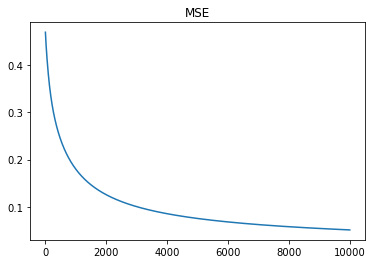

In [6]:
x, y = zip(*cycles_mse)
plt.plot(x, y)
plt.title('MSE')
plt.show()